-------------------------------------------------------------------
# Collaborative Filtering

## User based filtering
measure the similarity between target users and other users

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns
# Similarity
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
book_df = pd.read_csv('./Books.csv', low_memory=False)

ratings_df = pd.read_csv('./Ratings.csv')
user_df = pd.read_csv('./Users.csv')

### Ratings data overview

All 1149780 ratings that the dataset contains and its columns

In [3]:
ratings_df.info()
ratings_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6

### Ratings data cleaning

All 433671 after removing all Book-ratings that has the value 0.

In [4]:
ratings_df_clean = ratings_df[(ratings_df != 0)["Book-Rating"]]

In [5]:
ratings_df_clean.info()
ratings_df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433671 entries, 1 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      433671 non-null  int64 
 1   ISBN         433671 non-null  object
 2   Book-Rating  433671 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 13.2+ MB


User-ID        ISBN  Book-Rating
1   276726  0155061224            5
3   276729  052165615X            3
4   276729  0521795028            6
6   276736  3257224281            8
7   276737  0600570967            6

### User data overview

All 278858 users, data and data columns. Some users are missing their age. This has no effect on this filtering.

In [6]:
user_df.info()
user_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN

### Book data overview

271360 books in the book CSV. Some of the rows image url of large images are missing. Some Authors and publishers are also missing.

In [7]:
book_df.info()
book_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-M  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.amazon.com/images/P/0002005018.0...   
2  http://images.amazon.com/images/P/0060973129.0...   
3  http://images.amazon.com/images/P/0374157065.0...   
4  http://images.amazon.com/images/P/0393045218.0...   

                                         Image-URL-L  
0  http://images.amazon.com/images/P/0195153448.0...  
1  http://images.amazon.com/images/P/0002005018.0...  
2  http://images.amazon.com/images/P/0060973129.0...  
3  http://images.amazon.com/images/P/0374157065.0...  
4  http://images.amazon.com/images/P/0393045218.0...

### Data processing with cleaned ratings data 

Here the ratings and user files are joined based on User-ID that's present in both files. 

In [8]:
user_rating_df_clean = ratings_df_clean.merge(user_df, left_on = 'User-ID', right_on = 'User-ID')
user_rating_df_clean.info()
user_rating_df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 433671 entries, 0 to 433670
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   User-ID      433671 non-null  int64  
 1   ISBN         433671 non-null  object 
 2   Book-Rating  433671 non-null  int64  
 3   Location     433671 non-null  object 
 4   Age          305277 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 19.9+ MB


User-ID        ISBN  Book-Rating                            Location   Age
0   276726  0155061224            5            seattle, washington, usa   NaN
1   276729  052165615X            3                rijeka, n/a, croatia  16.0
2   276729  0521795028            6                rijeka, n/a, croatia  16.0
3   276736  3257224281            8         salzburg, salzburg, austria   NaN
4   276737  0600570967            6  sydney, new south wales, australia  14.0

In [9]:
print('The unique ratings are', sorted(user_rating_df_clean['Book-Rating'].unique()))

The unique ratings are [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


## Data exploration

### Overview of sum of ratings for all books

aggregate average of all books ratings

In [10]:
agg_ratings = user_rating_df_clean.groupby('ISBN').agg(mean_rating = ('Book-Rating', 'mean'),
                                                number_of_ratings = ('Book-Rating', 'count')).reset_index()

#### Amount of books with a rating with or with more than 5 ratings

In [11]:
agg_ratings[agg_ratings['number_of_ratings']>=5].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14535 entries, 32 to 185360
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               14535 non-null  object 
 1   mean_rating        14535 non-null  float64
 2   number_of_ratings  14535 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 454.2+ KB


#### Amount of books with a rating with or with more than 10 ratings

In [12]:
agg_ratings[agg_ratings['number_of_ratings']>=10].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5645 entries, 353 to 184829
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               5645 non-null   object 
 1   mean_rating        5645 non-null   float64
 2   number_of_ratings  5645 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 176.4+ KB


#### Amount of books with a rating with or with more than 50 ratings

In [13]:
agg_ratings_GT50 = agg_ratings[agg_ratings['number_of_ratings']>=50]
agg_ratings_GT50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 1926 to 148538
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               537 non-null    object 
 1   mean_rating        537 non-null    float64
 2   number_of_ratings  537 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 16.8+ KB


#### Amount of books with a rating with or with more than 100 ratings

In [14]:
agg_ratings[agg_ratings['number_of_ratings']>=100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 4029 to 141160
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               140 non-null    object 
 1   mean_rating        140 non-null    float64
 2   number_of_ratings  140 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.4+ KB


#### Most rated books (cleaned data)

In [15]:
agg_ratings_GT50.sort_values(by='number_of_ratings', ascending=False).head()

ISBN  mean_rating  number_of_ratings
26378   0316666343     8.185290                707
132534  0971880107     4.390706                581
44961   0385504209     8.435318                487
22405   0312195516     8.182768                383
90207   0679781587     8.408408                333

#### Most rated books (Raw data) 

In [16]:
user_rating_df = ratings_df.merge(user_df, left_on = 'User-ID', right_on = 'User-ID')
agg_ratings_raw = user_rating_df.groupby('ISBN').agg(mean_rating = ('Book-Rating', 'mean'),
                                                number_of_ratings = ('Book-Rating', 'count')).reset_index()
#q=agg_ratings_raw[agg_ratings['number_of_ratings']>=50]
#q.sort_values(by='number_of_ratings', ascending=False).head()

In [17]:
agg_ratings_GT50_raw = agg_ratings_raw[agg_ratings_raw['number_of_ratings']>=50]
agg_ratings_GT50_raw.sort_values(by='number_of_ratings', ascending=False).info()
agg_ratings_GT50_raw.sort_values(by='number_of_ratings', ascending=False).head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2185 entries, 247408 to 12768
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               2185 non-null   object 
 1   mean_rating        2185 non-null   float64
 2   number_of_ratings  2185 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 68.3+ KB


ISBN  mean_rating  number_of_ratings
247408  0971880107     1.019584               2502
47371   0316666343     4.468726               1295
83359   0385504209     4.652322                883
9637    0060928336     3.448087                732
41007   0312195516     4.334716                723

#### Plot overview of all ratings for books with cleaned data

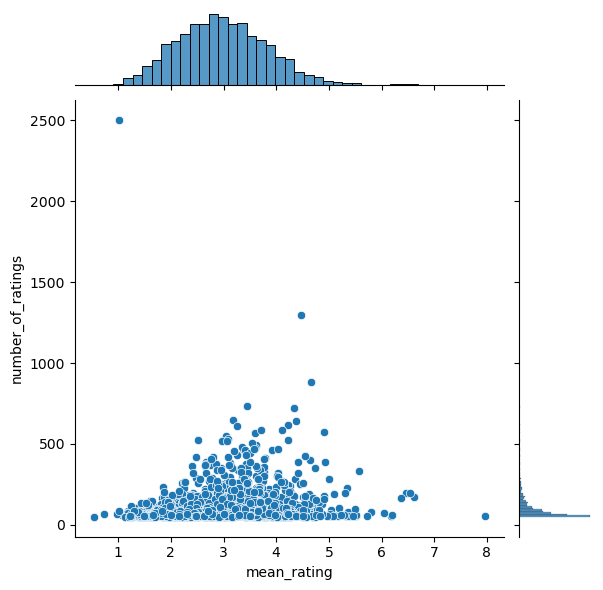

In [18]:
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_GT50_raw)

#### Plot overview of all ratings for books with cleaned data

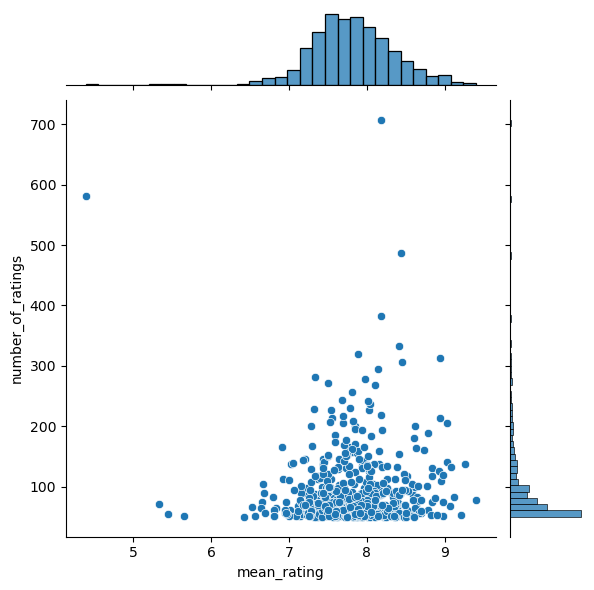

In [19]:
sns.jointplot(x='mean_rating', y='number_of_ratings', data=agg_ratings_GT50)

### After cleaning and explorating the data it's been determined to move forward with below data 

In [20]:
agg_ratings_GT50.info()
agg_ratings_GT50.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 1926 to 148538
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISBN               537 non-null    object 
 1   mean_rating        537 non-null    float64
 2   number_of_ratings  537 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 32.9+ KB


ISBN  mean_rating  number_of_ratings
1926  002542730X     7.805195                 77
2884  0060096195     8.132075                 53
3144  006016848X     6.947368                 57
3225  0060173289     7.610169                 59
3261  0060175400     8.384615                 78

### cleaning data so we only have the 537 books that have ratings on books with books that have +100 ratings

In [21]:
agg_ratings_GT350= agg_ratings[agg_ratings['number_of_ratings']>=350] # get the 4 most rated books

df_GT50 = pd.merge(user_rating_df_clean, agg_ratings_GT50, on='ISBN', how='inner')
df_GT350 = pd.merge(user_rating_df_clean, agg_ratings_GT350, on='ISBN', how='inner')
df_GT50.info()

agg_ratings_GT50.number_of_ratings.sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50192 entries, 0 to 50191
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User-ID            50192 non-null  int64  
 1   ISBN               50192 non-null  object 
 2   Book-Rating        50192 non-null  int64  
 3   Location           50192 non-null  object 
 4   Age                33755 non-null  float64
 5   mean_rating        50192 non-null  float64
 6   number_of_ratings  50192 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 3.1+ MB


50192

Filtering is made with 50.192 ratings from the 513 most liked books

In [22]:
df_GT50.head()

User-ID        ISBN  Book-Rating                   Location   Age  \
0   276744  038550120X            7  torrance, california, usa   NaN   
1    11676  038550120X           10              n/a, n/a, n/a   NaN   
2    16877  038550120X            9     houston, arkansas, usa  37.0   
3    17975  038550120X            6   fargo, north dakota, usa   NaN   
4    20806  038550120X            6       union, kentucky, usa   NaN   

   mean_rating  number_of_ratings  
0     7.580247                 81  
1     7.580247                 81  
2     7.580247                 81  
3     7.580247                 81  
4     7.580247                 81

In [23]:
print('The ratings file has', df_GT50['User-ID'].nunique(), 'unique users')
print('The ratings file has', df_GT50['ISBN'].nunique(), 'unique books')
print('The ratings file has', df_GT50['Book-Rating'].nunique(), 'unique ratings')
print('The unique ratings are', sorted(df_GT50['Book-Rating'].unique()))

The ratings file has 21078 unique users
The ratings file has 537 unique books
The ratings file has 10 unique ratings
The unique ratings are [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


## User-Matrix

#### User matrix where we take books with more than 350 ratings (just to get some idea of how it should look)

In [24]:
matrix = df_GT350.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating')
matrix.head()

ISBN     0312195516  0316666343  0385504209  0971880107
User-ID                                                
638             NaN        10.0        10.0         NaN
709             NaN         3.0         NaN         NaN
882             NaN         NaN        10.0         NaN
899             NaN         NaN         NaN         2.0
1008            9.0         NaN         NaN         NaN

In [25]:
matrix = df_GT50.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)
matrix.head()

ISBN     002542730X  0060096195  006016848X  0060173289  0060175400  \
User-ID                                                               
9               0.0         0.0         0.0         0.0         0.0   
16              0.0         0.0         0.0         0.0         0.0   
26              0.0         0.0         0.0         0.0         0.0   
42              0.0         0.0         0.0         0.0         0.0   
51              0.0         0.0         0.0         0.0         0.0   

ISBN     0060199652  0060391626  0060392452  0060502258  0060915544  ...  \
User-ID                                                              ...   
9               0.0         0.0         0.0         0.0         0.0  ...   
16              0.0         0.0         0.0         0.0         0.0  ...   
26              0.0         0.0         0.0         0.0         0.0  ...   
42              0.0         0.0         0.0         0.0         0.0  ...   
51              0.0         0.0         0.0         0.0         0.0  ...   

ISBN     1558745157  1559029838  1573225517  1573225789  1573227331  \
User-ID                                                               
9               0.0         0.0         0.0         0.0         0.0   
16              0.0         0.0         0.0         0.0         0.0   
26              0.0         0.0         0.0         0.0         0.0   
42              0.0         0.0         0.0         0.0         0.0   
51              0.0         0.0         0.0         0.0         0.0   

ISBN     1573229326  1573229571  1592400876  1844262553  1878424319  
User-ID                                                              
9               0.0         0.0         0.0         0.0         0.0  
16              0.0         0.0         0.0         0.0         0.0  
26              0.0         0.0         0.0         0.0         0.0  
42              0.0         0.0         0.0         0.0         0.0  
51              0.0         0.0         0.0         0.0         0.0  

[5 rows x 537 columns]

## Data normalization

In [26]:
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
matrix_norm.head()

ISBN     002542730X  0060096195  006016848X  0060173289  0060175400  \
User-ID                                                               
9         -0.011173   -0.011173   -0.011173   -0.011173   -0.011173   
16        -0.016760   -0.016760   -0.016760   -0.016760   -0.016760   
26        -0.035382   -0.035382   -0.035382   -0.035382   -0.035382   
42        -0.013035   -0.013035   -0.013035   -0.013035   -0.013035   
51        -0.016760   -0.016760   -0.016760   -0.016760   -0.016760   

ISBN     0060199652  0060391626  0060392452  0060502258  0060915544  ...  \
User-ID                                                              ...   
9         -0.011173   -0.011173   -0.011173   -0.011173   -0.011173  ...   
16        -0.016760   -0.016760   -0.016760   -0.016760   -0.016760  ...   
26        -0.035382   -0.035382   -0.035382   -0.035382   -0.035382  ...   
42        -0.013035   -0.013035   -0.013035   -0.013035   -0.013035  ...   
51        -0.016760   -0.016760   -0.016760   -0.016760   -0.016760  ...   

ISBN     1558745157  1559029838  1573225517  1573225789  1573227331  \
User-ID                                                               
9         -0.011173   -0.011173   -0.011173   -0.011173   -0.011173   
16        -0.016760   -0.016760   -0.016760   -0.016760   -0.016760   
26        -0.035382   -0.035382   -0.035382   -0.035382   -0.035382   
42        -0.013035   -0.013035   -0.013035   -0.013035   -0.013035   
51        -0.016760   -0.016760   -0.016760   -0.016760   -0.016760   

ISBN     1573229326  1573229571  1592400876  1844262553  1878424319  
User-ID                                                              
9         -0.011173   -0.011173   -0.011173   -0.011173   -0.011173  
16        -0.016760   -0.016760   -0.016760   -0.016760   -0.016760  
26        -0.035382   -0.035382   -0.035382   -0.035382   -0.035382  
42        -0.013035   -0.013035   -0.013035   -0.013035   -0.013035  
51        -0.016760   -0.016760   -0.016760   -0.016760   -0.016760  

[5 rows x 537 columns]

In [27]:
user_similarity = matrix_norm.T.corr()
user_similarity.head()

User-ID    9         16        26        42        51        91        97      \
User-ID                                                                         
9        1.000000 -0.001866 -0.002637 -0.001866 -0.001866 -0.001866 -0.001866   
16      -0.001866  1.000000 -0.002637 -0.001866 -0.001866 -0.001866 -0.001866   
26      -0.002637 -0.002637  1.000000 -0.002637 -0.002637 -0.002637 -0.002637   
42      -0.001866 -0.001866 -0.002637  1.000000 -0.001866 -0.001866 -0.001866   
51      -0.001866 -0.001866 -0.002637 -0.001866  1.000000 -0.001866 -0.001866   

User-ID    99        114       125     ...    278755    278773    278798  \
User-ID                                ...                                 
9       -0.001866 -0.002637 -0.001866  ... -0.001866 -0.001866 -0.001866   
16      -0.001866 -0.002637 -0.001866  ... -0.001866 -0.001866 -0.001866   
26      -0.002637 -0.003728 -0.002637  ... -0.002637 -0.002637 -0.002637   
42      -0.001866 -0.002637 -0.001866  ... -0.001866 -0.001866 -0.001866   
51      -0.001866 -0.002637 -0.001866  ... -0.001866 -0.001866 -0.001866   

User-ID    278800    278828    278832    278836    278843    278844    278854  
User-ID                                                                        
9       -0.001866 -0.001866 -0.001866 -0.001866 -0.004575 -0.002633 -0.003231  
16      -0.001866 -0.001866 -0.001866 -0.001866 -0.004575 -0.002633 -0.003231  
26      -0.002637 -0.002637 -0.002637 -0.002637 -0.006467 -0.003722 -0.004567  
42      -0.001866 -0.001866 -0.001866 -0.001866 -0.004575 -0.002633 -0.003231  
51      -0.001866 -0.001866 -0.001866 -0.001866 -0.004575 -0.002633 -0.003231  

[5 rows x 21078 columns]

## Find similar users

In [29]:
# user we're doing the filtering based on
userid = 26

# Remove picked user ID from the list
user_similarity.drop(index=userid, inplace=True)
# Take a look at the data
user_similarity.head()

User-ID    9         16        26        42        51        91        97      \
User-ID                                                                         
9        1.000000 -0.001866 -0.002637 -0.001866 -0.001866 -0.001866 -0.001866   
16      -0.001866  1.000000 -0.002637 -0.001866 -0.001866 -0.001866 -0.001866   
42      -0.001866 -0.001866 -0.002637  1.000000 -0.001866 -0.001866 -0.001866   
51      -0.001866 -0.001866 -0.002637 -0.001866  1.000000 -0.001866 -0.001866   
91      -0.001866 -0.001866 -0.002637 -0.001866 -0.001866  1.000000 -0.001866   

User-ID    99        114       125     ...    278755    278773    278798  \
User-ID                                ...                                 
9       -0.001866 -0.002637 -0.001866  ... -0.001866 -0.001866 -0.001866   
16      -0.001866 -0.002637 -0.001866  ... -0.001866 -0.001866 -0.001866   
42      -0.001866 -0.002637 -0.001866  ... -0.001866 -0.001866 -0.001866   
51      -0.001866 -0.002637 -0.001866  ... -0.001866 -0.001866 -0.001866   
91      -0.001866 -0.002637 -0.001866  ... -0.001866 -0.001866 -0.001866   

User-ID    278800    278828    278832    278836    278843    278844    278854  
User-ID                                                                        
9       -0.001866 -0.001866 -0.001866 -0.001866 -0.004575 -0.002633 -0.003231  
16      -0.001866 -0.001866 -0.001866 -0.001866 -0.004575 -0.002633 -0.003231  
42      -0.001866 -0.001866 -0.001866 -0.001866 -0.004575 -0.002633 -0.003231  
51      -0.001866 -0.001866 -0.001866 -0.001866 -0.004575 -0.002633 -0.003231  
91      -0.001866 -0.001866 -0.001866 -0.001866 -0.004575 -0.002633 -0.003231  

[5 rows x 21078 columns]

In [30]:
n_users = 500
user_min_similar = 0.5


similar_users = user_similarity[user_similarity[userid]>=user_min_similar][userid].sort_values(ascending=False)[:n_users]
# Print out top n similar users
print(f'The similar users for user {userid} are', similar_users)

The similar users for user 26 are User-ID
43113     0.742735
68861     0.742735
73486     0.742735
75429     0.742735
53117     0.742735
            ...   
85433     0.523817
42323     0.523817
52044     0.520602
277722    0.520602
93909     0.501598
Name: 26, Length: 123, dtype: float64


In [32]:
userid_watched = matrix_norm[matrix_norm.index == userid].dropna(axis=1, how='all')
userid_watched

ISBN     002542730X  0060096195  006016848X  0060173289  0060175400  \
User-ID                                                               
26        -0.035382   -0.035382   -0.035382   -0.035382   -0.035382   

ISBN     0060199652  0060391626  0060392452  0060502258  0060915544  ...  \
User-ID                                                              ...   
26        -0.035382   -0.035382   -0.035382   -0.035382   -0.035382  ...   

ISBN     1558745157  1559029838  1573225517  1573225789  1573227331  \
User-ID                                                               
26        -0.035382   -0.035382   -0.035382   -0.035382   -0.035382   

ISBN     1573229326  1573229571  1592400876  1844262553  1878424319  
User-ID                                                              
26        -0.035382   -0.035382   -0.035382   -0.035382   -0.035382  

[1 rows x 537 columns]

### Books similar to the ones the user has rated

In [33]:
similar_user_books = matrix_norm[matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')

# exclude already liked books
similar_user_books.drop(userid_watched.columns,axis=0, inplace=True, errors='ignore') 
similar_user_books

ISBN     002542730X  0060096195  006016848X  0060173289  0060175400  \
User-ID                                                               
367       -0.016760   -0.016760   -0.016760   -0.016760   -0.016760   
1032      -0.018622   -0.018622   -0.018622   -0.018622   -0.018622   
3542      -0.024209   -0.024209   -0.024209   -0.024209   -0.024209   
4225      -0.050279   -0.050279   -0.050279   -0.050279   -0.050279   
5375      -0.014898   -0.014898   -0.014898   -0.014898   -0.014898   
...             ...         ...         ...         ...         ...   
271859    -0.018622   -0.018622   -0.018622   -0.018622   -0.018622   
274363    -0.014898   -0.014898   -0.014898   -0.014898   -0.014898   
276953    -0.018622   -0.018622   -0.018622   -0.018622   -0.018622   
277722    -0.033520   -0.033520   -0.033520   -0.033520   -0.033520   
277743    -0.016760   -0.016760   -0.016760   -0.016760   -0.016760   

ISBN     0060199652  0060391626  0060392452  0060502258  0060915544  ...  \
User-ID                                                              ...   
367       -0.016760   -0.016760   -0.016760   -0.016760   -0.016760  ...   
1032      -0.018622   -0.018622   -0.018622   -0.018622   -0.018622  ...   
3542      -0.024209   -0.024209   -0.024209   -0.024209   -0.024209  ...   
4225      -0.050279   -0.050279   -0.050279   -0.050279   -0.050279  ...   
5375      -0.014898   -0.014898   -0.014898   -0.014898   -0.014898  ...   
...             ...         ...         ...         ...         ...  ...   
271859    -0.018622   -0.018622   -0.018622   -0.018622   -0.018622  ...   
274363    -0.014898   -0.014898   -0.014898   -0.014898   -0.014898  ...   
276953    -0.018622   -0.018622   -0.018622   -0.018622   -0.018622  ...   
277722    -0.033520   -0.033520   -0.033520   -0.033520   -0.033520  ...   
277743    -0.016760   -0.016760   -0.016760   -0.016760   -0.016760  ...   

ISBN     1558745157  1559029838  1573225517  1573225789  1573227331  \
User-ID                                                               
367       -0.016760   -0.016760   -0.016760   -0.016760   -0.016760   
1032      -0.018622   -0.018622   -0.018622   -0.018622   -0.018622   
3542      -0.024209   -0.024209   -0.024209   -0.024209   -0.024209   
4225      -0.050279   -0.050279   -0.050279   -0.050279   -0.050279   
5375      -0.014898   -0.014898   -0.014898   -0.014898   -0.014898   
...             ...         ...         ...         ...         ...   
271859    -0.018622   -0.018622   -0.018622   -0.018622   -0.018622   
274363    -0.014898   -0.014898   -0.014898   -0.014898   -0.014898   
276953    -0.018622   -0.018622   -0.018622   -0.018622   -0.018622   
277722    -0.033520   -0.033520   -0.033520   -0.033520   -0.033520   
277743    -0.016760   -0.016760   -0.016760   -0.016760   -0.016760   

ISBN     1573229326  1573229571  1592400876  1844262553  1878424319  
User-ID                                                              
367       -0.016760   -0.016760   -0.016760   -0.016760   -0.016760  
1032      -0.018622   -0.018622   -0.018622   -0.018622   -0.018622  
3542      -0.024209   -0.024209   -0.024209   -0.024209   -0.024209  
4225       4.949721   -0.050279   -0.050279   -0.050279   -0.050279  
5375      -0.014898   -0.014898   -0.014898   -0.014898   -0.014898  
...             ...         ...         ...         ...         ...  
271859    -0.018622   -0.018622   -0.018622   -0.018622   -0.018622  
274363    -0.014898   -0.014898   -0.014898   -0.014898   -0.014898  
276953    -0.018622   -0.018622   -0.018622   -0.018622   -0.018622  
277722    -0.033520   -0.033520   -0.033520   -0.033520   -0.033520  
277743    -0.016760   -0.016760   -0.016760   -0.016760   -0.016760  

[123 rows x 537 columns]

### Remove negative numbers

In [34]:
similar_user_books[similar_user_books < 0] = float("NaN")
similar_user_books

ISBN     002542730X  0060096195  006016848X  0060173289  0060175400  \
User-ID                                                               
367             NaN         NaN         NaN         NaN         NaN   
1032            NaN         NaN         NaN         NaN         NaN   
3542            NaN         NaN         NaN         NaN         NaN   
4225            NaN         NaN         NaN         NaN         NaN   
5375            NaN         NaN         NaN         NaN         NaN   
...             ...         ...         ...         ...         ...   
271859          NaN         NaN         NaN         NaN         NaN   
274363          NaN         NaN         NaN         NaN         NaN   
276953          NaN         NaN         NaN         NaN         NaN   
277722          NaN         NaN         NaN         NaN         NaN   
277743          NaN         NaN         NaN         NaN         NaN   

ISBN     0060199652  0060391626  0060392452  0060502258  0060915544  ...  \
User-ID                                                              ...   
367             NaN         NaN         NaN         NaN         NaN  ...   
1032            NaN         NaN         NaN         NaN         NaN  ...   
3542            NaN         NaN         NaN         NaN         NaN  ...   
4225            NaN         NaN         NaN         NaN         NaN  ...   
5375            NaN         NaN         NaN         NaN         NaN  ...   
...             ...         ...         ...         ...         ...  ...   
271859          NaN         NaN         NaN         NaN         NaN  ...   
274363          NaN         NaN         NaN         NaN         NaN  ...   
276953          NaN         NaN         NaN         NaN         NaN  ...   
277722          NaN         NaN         NaN         NaN         NaN  ...   
277743          NaN         NaN         NaN         NaN         NaN  ...   

ISBN     1558745157  1559029838  1573225517  1573225789  1573227331  \
User-ID                                                               
367             NaN         NaN         NaN         NaN         NaN   
1032            NaN         NaN         NaN         NaN         NaN   
3542            NaN         NaN         NaN         NaN         NaN   
4225            NaN         NaN         NaN         NaN         NaN   
5375            NaN         NaN         NaN         NaN         NaN   
...             ...         ...         ...         ...         ...   
271859          NaN         NaN         NaN         NaN         NaN   
274363          NaN         NaN         NaN         NaN         NaN   
276953          NaN         NaN         NaN         NaN         NaN   
277722          NaN         NaN         NaN         NaN         NaN   
277743          NaN         NaN         NaN         NaN         NaN   

ISBN     1573229326  1573229571  1592400876  1844262553  1878424319  
User-ID                                                              
367             NaN         NaN         NaN         NaN         NaN  
1032            NaN         NaN         NaN         NaN         NaN  
3542            NaN         NaN         NaN         NaN         NaN  
4225       4.949721         NaN         NaN         NaN         NaN  
5375            NaN         NaN         NaN         NaN         NaN  
...             ...         ...         ...         ...         ...  
271859          NaN         NaN         NaN         NaN         NaN  
274363          NaN         NaN         NaN         NaN         NaN  
276953          NaN         NaN         NaN         NaN         NaN  
277722          NaN         NaN         NaN         NaN         NaN  
277743          NaN         NaN         NaN         NaN         NaN  

[123 rows x 537 columns]

## Show the items other similar users like

Collaborative user-based filtering result for user 26


[Text(0.5, 1.0, 'Top 25 recommended books for user 26 with a >0.5 similarity')]

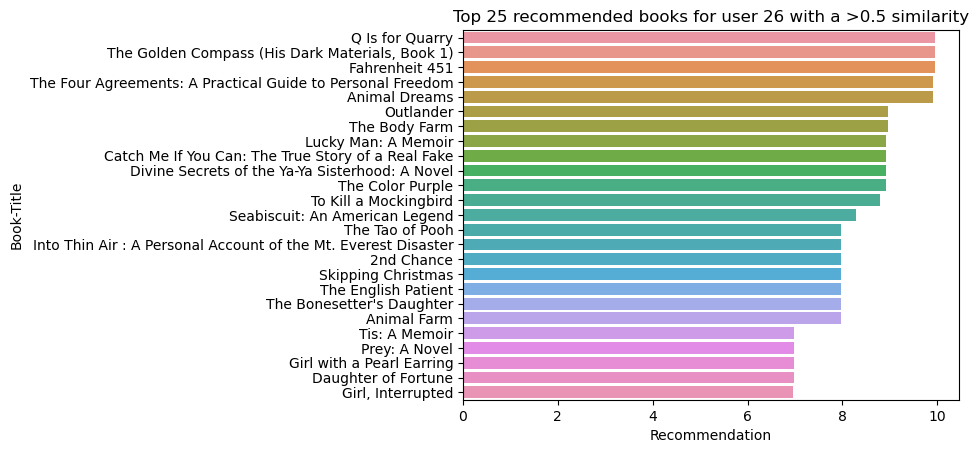

In [80]:
import math
books = {}

for i in similar_user_books.columns:
    
    total = 0 # total rating
    count = 0 # rating count

    ISBN_and_similarity_with_other_users = similar_user_books[i]

    for j in ISBN_and_similarity_with_other_users:
        if math.isnan(j) == False:
            total+=j
            count+=1
            books[i] = total / count

            
books = pd.DataFrame(books.items(), columns=[ 'ISBN', 'Recommendation'])
recommended_books = books.sort_values(by='Recommendation', ascending=False)

m = 10
most_recommended_books = recommended_books.head(m).reset_index(drop=True)


recommended_books_with_title = book_df.merge(recommended_books, left_on = 'ISBN', right_on = 'ISBN').sort_values(by='Recommendation', ascending=False)

print("Collaborative user-based filtering result for user 26")
sns.barplot(x = "Recommendation", y = "Book-Title", data = recommended_books_with_title.head(25)).set(title = "Top 25 recommended books for user 26 with a >0.5 similarity")
# the more books we're scanning the more likely we're to find a near-neighbouring user that has the same profile - hence more book data to analyse based on
# the downside is longer load time